-----------------------------------------

## **2. Data Modelling**

-----------------------------------------

### Table of Contents

* [2.1 Importing the Datasets and Libraries](#1.1)
* [1.2 Dataset Preparation](#1.2)
* [1.3 Clustering](#1.3)
* [1.4 UMAP Plot](#1.4)
* [1.5 Exporting the Datasets](#1.5)

-----------------------------------------

<a id="2.1"></a>
    
## <font color='#FFFFF'>2.1. Importing the Datasets and Libraries <font>

This section, as mentioned in the title, is intended for importing the data and necessary libraries.

In [1]:
# Data manipulation and analysis
import umap
import pandas as pd

# Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext autoreload
%autoreload 2
from Functions import *
from Visualizations import *

In [3]:
# Customers dataset
customers = pd.read_csv('Datasets/customers.csv')

# Fishy customers dataset
fishy_customers = pd.read_csv('Datasets/fishy_customers.csv')

<a id="2.2"></a>
    
## <font color='#FFFFF'>2.2. Dataset Preparation <font>

In order to correctly implement the clustering models, all categorical variables were dropped. Additionally, 'kids_home' and 'teens_home' variables were removed as 'Children' variable sums both. Furthermore, 'Total Amount Spend' was discarded due to its high correlation with 'spend_groceries'.

In [4]:
customers.drop(['customer_id', 'customer_name', 'customer_gender', 'Education','has_loyalty_card', 'kids_home', 'teens_home', 'Total Amount Spent'], axis = 1, inplace = True)

Subsequently, we chose to form four distinct datasets. One retains the data in its original unscaled form, while the remaining three employ diverse scaling techniques: Standard, Min-Max, and Robust.
<br>
This variation enables us to rigorously test the models.

Before proceeding with the code implementation, the definitions of the three scalers are as follows:

<b>Standard Scaler</b> standardizes features by removing the mean and scaling to unit variance. It centers the feature values around 0 and scales them to have a standard deviation of 1, ensuring all features are on a similar scale.

<b>Min-Max Scaler</b> scales features to a given range, usually between 0 and 1 (or any other specified range). It rescales each feature by subtracting the minimum value and then dividing by the range, giving all features a common minimum and maximum.

<b>Robust Scaler</b> scales features using percentiles and median instead of mean and variance. It removes the median and scales the data based on the IQR (Interquartile Range), making it robust to outliers by using more robust estimates of central tendency.

In [5]:
# No Scaling
customers_without_scaling = customers.copy()

# Standard Scaling
customers_standard_scaling = StandardScaler().fit_transform(customers)

# Min-Max Scaling
customers_min_max_scaling = MinMaxScaler().fit_transform(customers)

# Robust Scaling
customers_robust_scaling = RobustScaler().fit_transform(customers)

This section involves the application of clustering algorithms to derive the final solution. It's important to mention that all the methods outlined below were tested using the four datasets.

<a id="2.3"></a>
    
## <font color='#FFFFF'>2.3. Clustering <font>

<b>K Means</b>

The k-means algorithm partitions data into k clusters, each represented by a centroid. It aims to minimize intra-group variance by iteratively assigning data points to the nearest centroid and updating the centroids until convergence. The quality of clustering is based on the proximity of points within the same cluster. Adjusting the number of clusters (k) can impact the clustering's effectiveness in reducing the sum of squared errors.
<br>
https://elearning.novaims.unl.pt/mod/resource/view.php?id=74695

* Without Scaling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

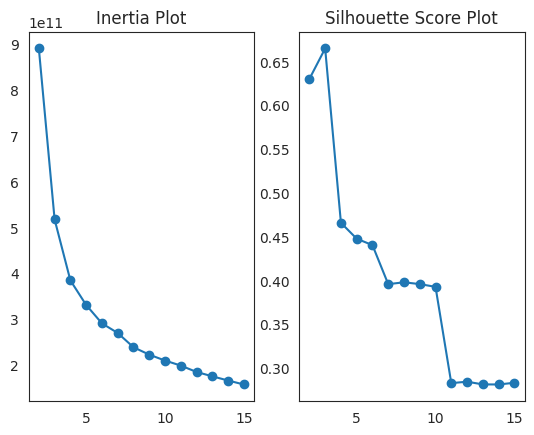

In [ ]:
plot_inertia_and_silhouette(customers_without_scaling)

Based on the inertia plot indicating an 'elbow' at around 5 and the silhouette plot peaking between 2 to 4, we opted to prioritize the silhouette plot.
<br>
We proceeded to test the K-means algorithm with 2, 3, and 4 clusters for further evaluation.

In [ ]:
kmeans_no_scalling_2 = KMeans(n_clusters = 2, random_state = 0).fit(customers_without_scaling)
kmeans_no_scalling_3 = KMeans(n_clusters = 3, random_state = 0).fit(customers_without_scaling)
kmeans_no_scalling_4 = KMeans(n_clusters = 4, random_state = 0).fit(customers_without_scaling)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Setting the <u>random_state</u> parameter to 0 ensures that the results of the KMeans algorithm will be deterministic. It fixes the random seed used by the clustering algorithm, meaning that running the algorithm multiple times with the same random state will produce the same results, aiding in result reproducibility and consistency.

In [ ]:
customers['kmeans_no_scalling_2'] = kmeans_no_scalling_2.predict(customers_without_scaling)
customers['kmeans_no_scalling_3'] = kmeans_no_scalling_3.predict(customers_without_scaling)
customers['kmeans_no_scalling_4'] = kmeans_no_scalling_4.predict(customers_without_scaling)

Each of these was further tested using a distinct silhouette plot and a silhouette score.

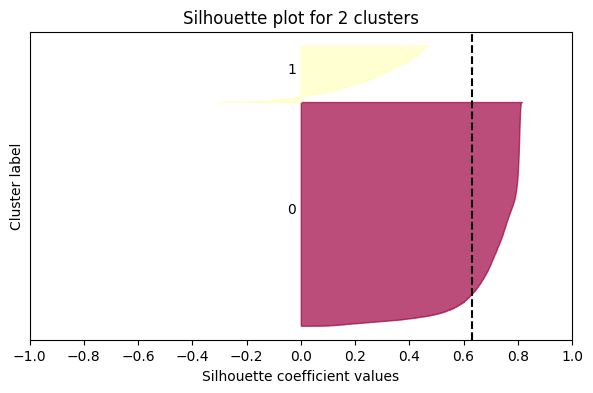

Silhouette score for 2 clusters: 0.6301


In [ ]:
silhoette(customers, 'kmeans_no_scalling_2')

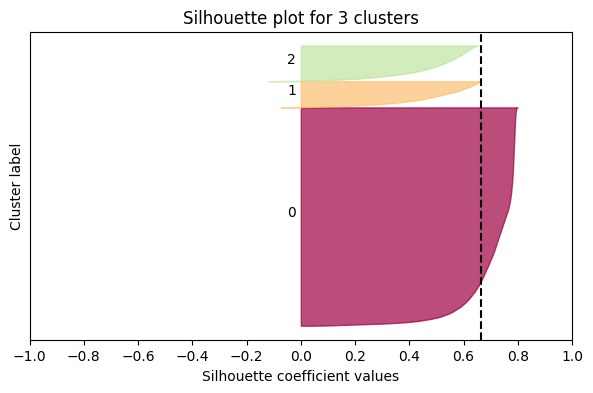

Silhouette score for 3 clusters: 0.6649


In [ ]:
silhoette(customers, 'kmeans_no_scalling_3')

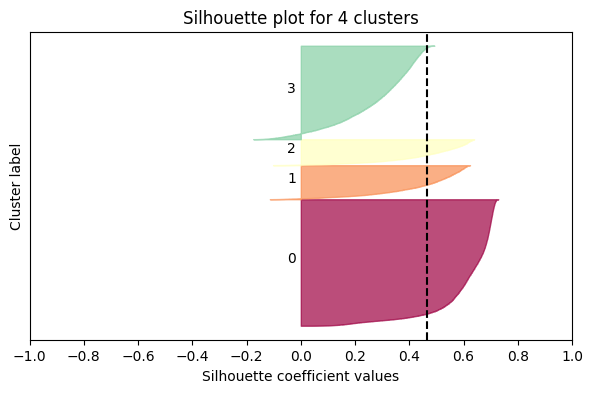

Silhouette score for 4 clusters: 0.4658


In [ ]:
silhoette(customers, 'kmeans_no_scalling_4')

Since none of the scores were satisfactory, the three columns containing the values of the K means for each number of clusters were dropped.

In [ ]:
customers.drop(['kmeans_no_scalling_2', 'kmeans_no_scalling_3', 'kmeans_no_scalling_4'], axis = 1, inplace = True)

* Standard Scaling

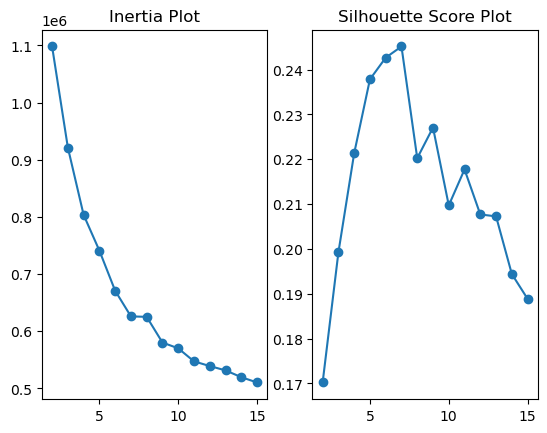

In [ ]:
plot_inertia_and_silhouette(customers_standard_scaling)

Based on the inertia plot indicating an 'elbow' at around 6 and the silhouette plot peaking between 6 to 8, we opted to prioritize the silhouette plot.
<br>
We proceeded to test the K-means algorithm with 6, 7, and 8 clusters for further evaluation.

In [ ]:
kmeans_standard_6 = KMeans(n_clusters = 6, random_state = 0).fit(customers_standard_scaling)
kmeans_standard_7 = KMeans(n_clusters = 7, random_state = 0).fit(customers_standard_scaling)
kmeans_standard_8 = KMeans(n_clusters = 8, random_state = 0).fit(customers_standard_scaling)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
customers['kmeans_standard_6'] = kmeans_standard_6.predict(customers_standard_scaling)
customers['kmeans_standard_7'] = kmeans_standard_7.predict(customers_standard_scaling)
customers['kmeans_standard_8'] = kmeans_standard_8.predict(customers_standard_scaling)

Each of these was further tested using a distinct silhouette plot and a silhouette score.

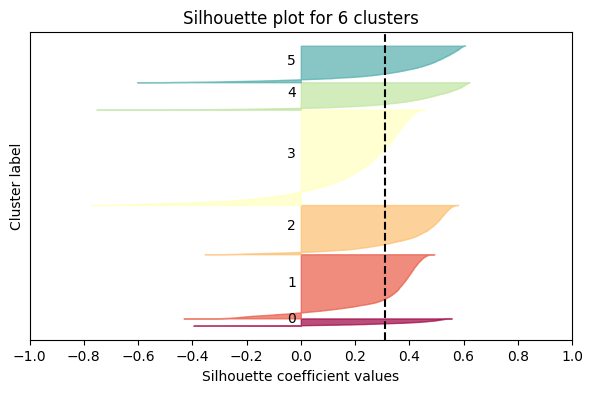

Silhouette score for 6 clusters: 0.3111


In [ ]:
silhoette(customers, 'kmeans_standard_6')

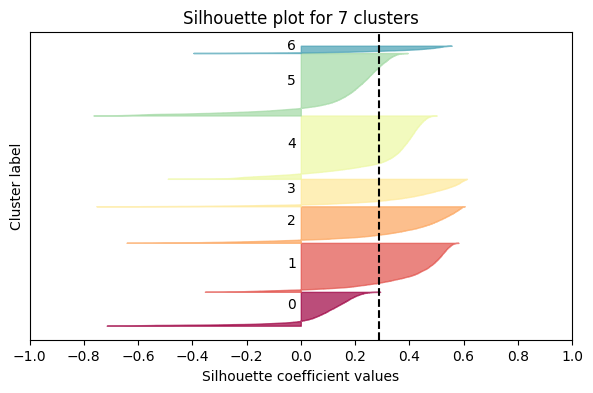

Silhouette score for 7 clusters: 0.2868


In [ ]:
silhoette(customers, 'kmeans_standard_7')

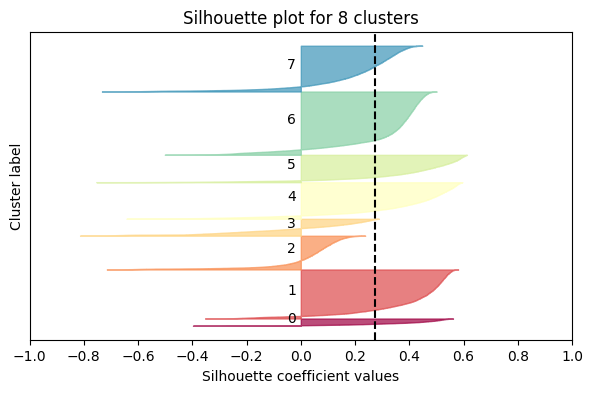

Silhouette score for 8 clusters: 0.2723


In [ ]:
silhoette(customers, 'kmeans_standard_8')

Since none of the scores were satisfactory, the three columns containing the values of the K means for each number of clusters were dropped.

In [ ]:
customers.drop(['kmeans_standard_6', 'kmeans_standard_7', 'kmeans_standard_8'], axis = 1, inplace = True)

* Min Max Scaling

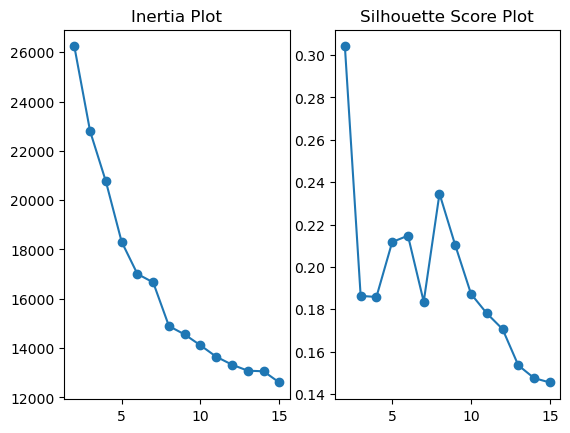

In [ ]:
plot_inertia_and_silhouette(customers_min_max_scaling)

Based on the inertia plot indicating an 'elbow' at around 5 and the silhouette plot peaking between 7 to 8, we opted to prioritize the silhouette plot.
<br>
We proceeded to test the K-means algorithm with 7, 8, and 9 clusters for further evaluation.

In [ ]:
kmeans_min_max_7 = KMeans(n_clusters = 7, random_state = 0).fit(customers_min_max_scaling)
kmeans_min_max_8 = KMeans(n_clusters = 8, random_state = 0).fit(customers_min_max_scaling)
kmeans_min_max_9 = KMeans(n_clusters = 9, random_state = 0).fit(customers_min_max_scaling)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
customers['kmeans_min_max_7'] = kmeans_min_max_7.predict(customers_min_max_scaling)
customers['kmeans_min_max_8'] = kmeans_min_max_8.predict(customers_min_max_scaling)
customers['kmeans_min_max_9'] = kmeans_min_max_9.predict(customers_min_max_scaling)

Each of these was further tested using a distinct silhouette plot and a silhouette score.

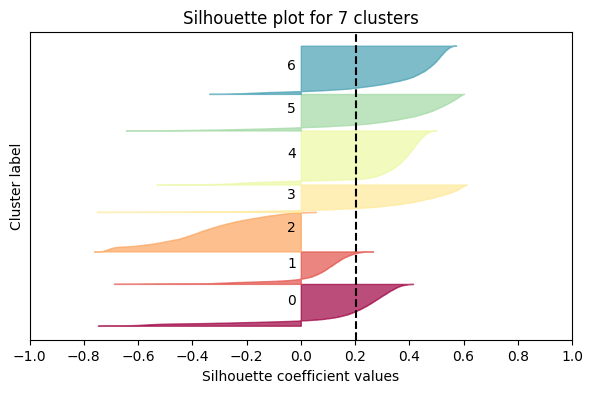

Silhouette score for 7 clusters: 0.2021


In [ ]:
silhoette(customers, 'kmeans_min_max_7')

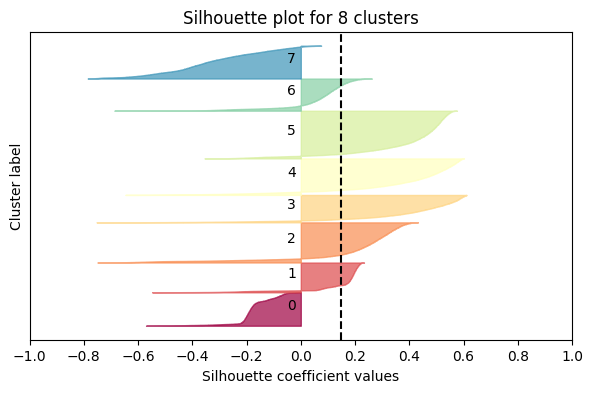

Silhouette score for 8 clusters: 0.1492


In [ ]:
silhoette(customers, 'kmeans_min_max_8')

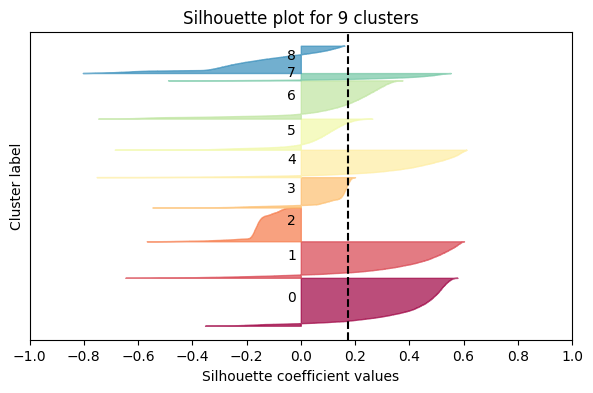

Silhouette score for 9 clusters: 0.1726


In [ ]:
silhoette(customers, 'kmeans_min_max_9')

Since none of the scores were satisfactory, the three columns containing the values of the K means for each number of clusters were dropped.

In [ ]:
customers.drop(['kmeans_min_max_7', 'kmeans_min_max_8', 'kmeans_min_max_9'], axis = 1, inplace = True)

* Robust Scaling

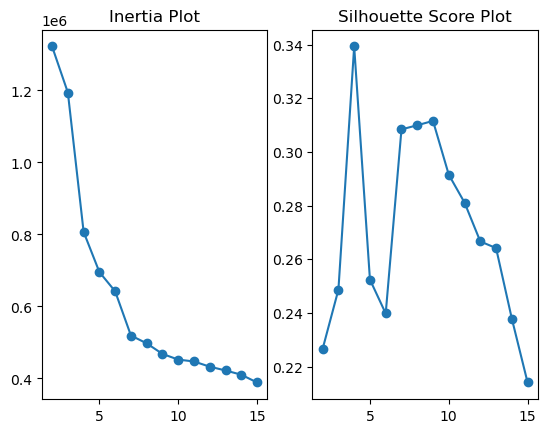

In [ ]:
plot_inertia_and_silhouette(customers_robust_scaling)

Based on the inertia plot indicating an 'elbow' at around 6 and the silhouette plot peaking between 3 to 5, we opted to prioritize the silhouette plot.
<br>
We proceeded to test the K-means algorithm with 3, 4, and 5 clusters for further evaluation.

In [ ]:
kmeans_robust_3 = KMeans(n_clusters = 3, random_state = 0).fit(customers_robust_scaling)
kmeans_robust_4 = KMeans(n_clusters = 4, random_state = 0).fit(customers_robust_scaling)
kmeans_robust_5 = KMeans(n_clusters = 5, random_state = 0).fit(customers_robust_scaling)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
customers['kmeans_robust_3'] = kmeans_robust_3.predict(customers_robust_scaling)
customers['kmeans_robust_4'] = kmeans_robust_4.predict(customers_robust_scaling)
customers['kmeans_robust_5'] = kmeans_robust_5.predict(customers_robust_scaling)

Each of these was further tested using a distinct silhouette plot and a silhouette score.

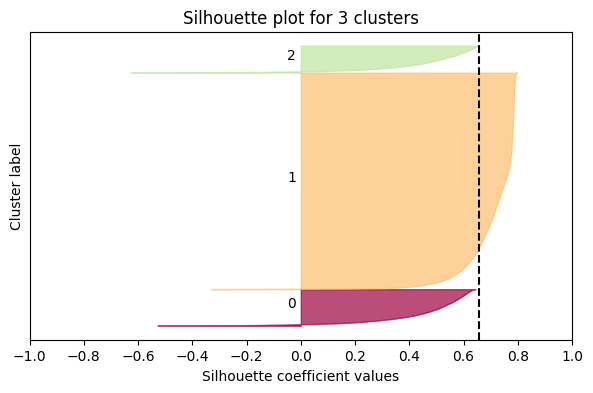

Silhouette score for 3 clusters: 0.6572


In [ ]:
silhoette(customers, 'kmeans_robust_3')

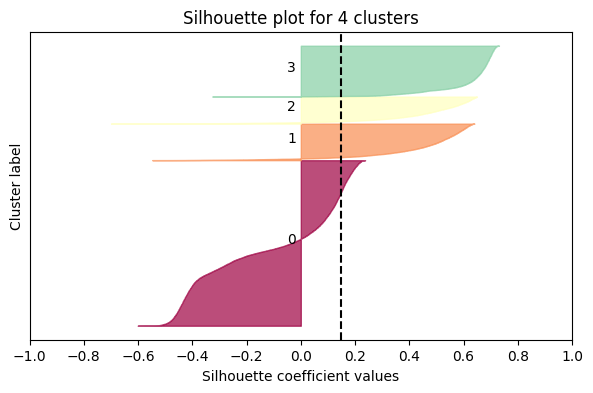

Silhouette score for 4 clusters: 0.1476


In [ ]:
silhoette(customers, 'kmeans_robust_4')

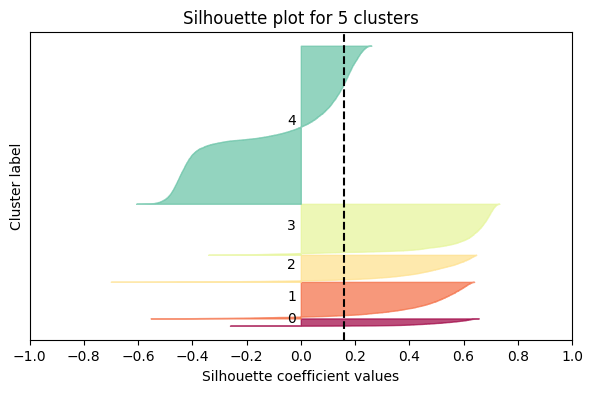

Silhouette score for 5 clusters: 0.1606


In [ ]:
silhoette(customers, 'kmeans_robust_5')

Since none of the scores were satisfactory, the three columns containing the values of the K means for each number of clusters were dropped.

In [ ]:
customers.drop(['kmeans_robust_3', 'kmeans_robust_4', 'kmeans_robust_5'], axis = 1, inplace = True)

All cluster outcomes from the K-means clustering analysis were dismissed as none of the clusters exhibited silhouette scores close to 1, which was a criterion set to identify clearly separated and distinct segments within the data.

<b>Hierarchical Clustering</b>

In hierarchical clustering, a distance matrix is created as the first step of the algorithm. This matrix contains values calculated by applying a distance function to each pair of objects in the data set. The Euclidean distance function is commonly used for this purpose.
<br>
https://elearning.novaims.unl.pt/mod/resource/view.php?id=74891

<u><b>Single-Linkage</b></u>

Each data point starts as its own cluster. At each step, the two clusters with the smallest minimum pairwise distance are merged together. This process continues until all data points belong to a single cluster.

Single hierarchical clustering prioritizes connecting clusters based on the closest points, resulting in elongated clusters that can be sensitive to outliers.

* Without Scaling

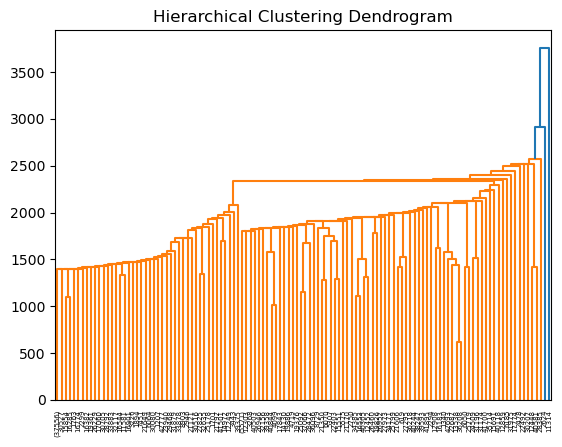

In [ ]:
create_dendrogram(customers_without_scaling, 'single')

The dendrogram lacks sufficient information to determine the ideal number of clusters effectively.

* Standard Scaling

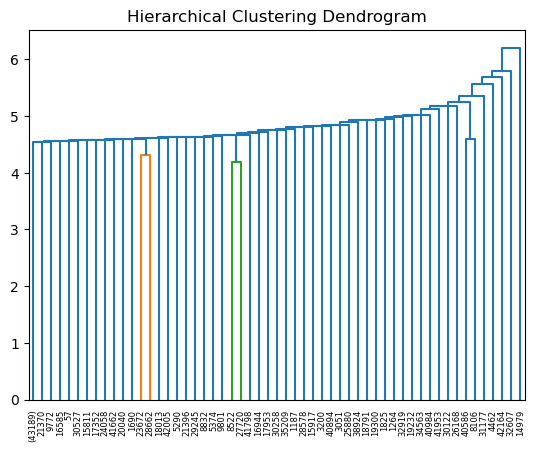

In [ ]:
create_dendrogram(customers_standard_scaling, 'single')

The dendrogram lacks sufficient information to determine the ideal number of clusters effectively.

* Min Max Scaling

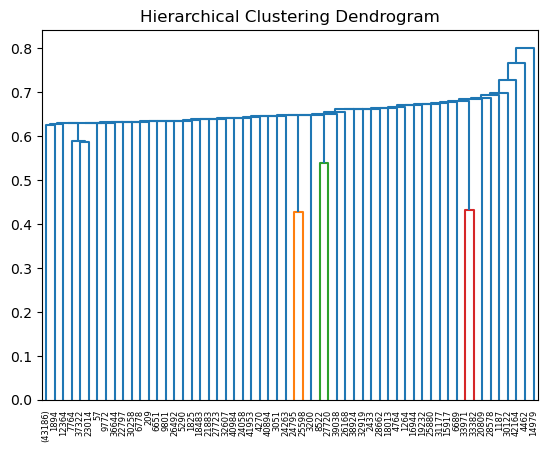

In [ ]:
create_dendrogram(customers_min_max_scaling, 'single')

The dendrogram lacks sufficient information to determine the ideal number of clusters effectively.

* Robust Scaling

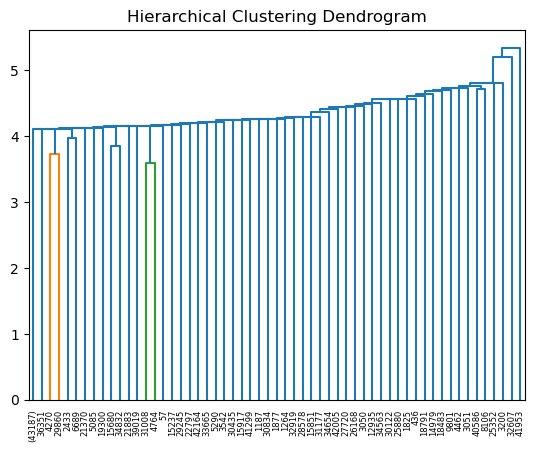

In [ ]:
create_dendrogram(customers_robust_scaling, 'single')

The dendrogram lacks sufficient information to determine the ideal number of clusters effectively.

<u><b>Average-Linkage</b></u>

In this approach, the distance between clusters is calculated as the average distance between all pairs of data points in the two clusters. This method tends to produce more balanced and cohesive clusters compared to other linkage methods.
<br>
By iteratively merging the closest clusters based on average linkage, a hierarchical tree-like structure is formed, allowing for a visualization of the relationships between data points at different levels of granularity.

* Without Scaling

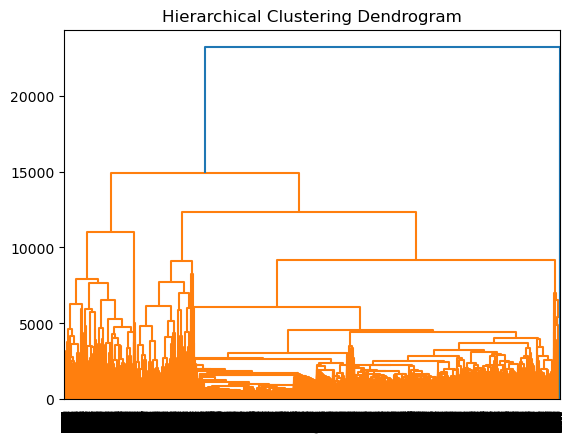

In [ ]:
create_dendrogram(customers_without_scaling, 'average')

From the dendrogram, it can be observed that the optimal number of clusters is 3.

In [ ]:
customers['no_scaling_average_3'] = AgglomerativeClustering(linkage = 'average', n_clusters = 3).fit_predict(customers_without_scaling)

In [ ]:
group_by_mean(customers,'no_scaling_average_3')

no_scaling_average_3,0,1,2
number_complaints,0.696949,0.600000,0.000000
distinct_stores_visited,1.655758,1.000000,2.000000
spend_groceries,5523.360825,23865.400000,26432.000000
spend_electronics,2016.169508,203.400000,17738.000000
typical_hour,13.551047,10.400000,20.000000
spend_vegetables,457.366285,266.400000,507.000000
spend_nonalcohol_drinks,444.831880,560.600000,628.000000
spend_alcohol_drinks,497.657307,17.000000,887.000000
spend_meat,715.008002,237.200000,1747.000000
spend_fish,1132.624502,453.684769,3739.000000


<b>Cluster 0</b>, referred to as the <u>Savings Squad</u>, comprises customers with the highest number of complaints and the greatest percentage of purchases made during promotions. Additionally, this cluster includes the oldest customers in the dataset.

<b>Cluster 1</b>, labeled as the <u>Loners</u>, consists of individuals who spend minimal amounts on alcohol, hygiene products, and zero euros on video games. Members of this cluster also do not have any children.

<b>Cluster 2</b>, known as the <u>Big Families</u>, is characterized by having no complaints, visiting the most distinct stores, and exhibiting high expenditures on groceries and electronics. Furthermore, this group includes customers with the most number of children.

* Standard Scaling

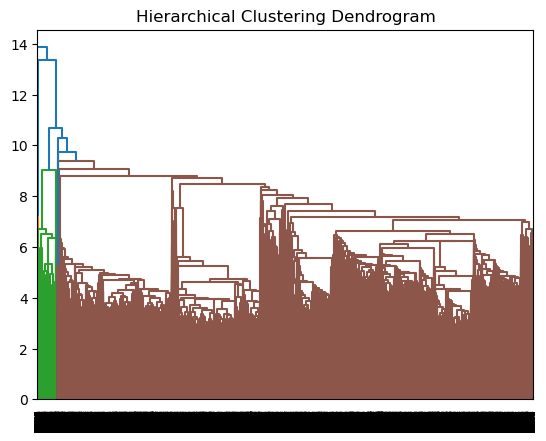

In [ ]:
create_dendrogram(customers_standard_scaling, 'average')

The dendrogram lacks sufficient information to determine the ideal number of clusters effectively.

* Min Max Scaling

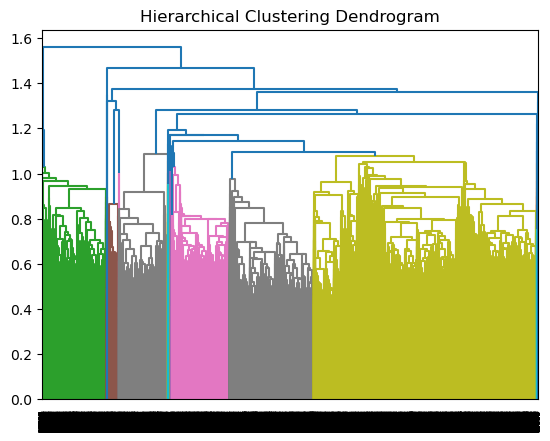

In [ ]:
create_dendrogram(customers_min_max_scaling, 'average')

The dendrogram lacks sufficient information to determine the ideal number of clusters effectively.

* Robust Scaling

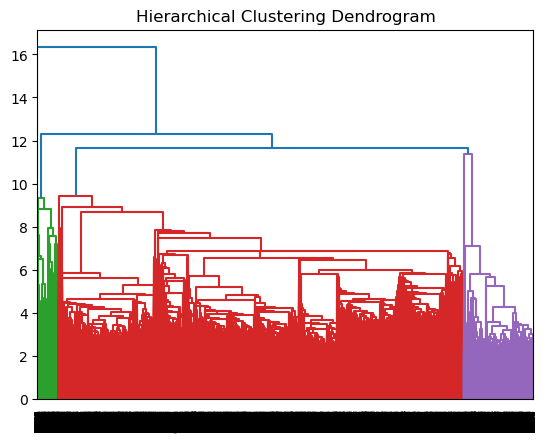

In [ ]:
create_dendrogram(customers_robust_scaling, 'average')

From the dendrogram, it can be observed that the optimal number of clusters is 4.

In [ ]:
customers['robust_average_4'] = AgglomerativeClustering(linkage = 'average', n_clusters = 4).fit_predict(customers_robust_scaling)

In [ ]:
group_by_mean(customers,'robust_average_4' )

robust_average_4,0,1,2,3
number_complaints,0.738624,0.498340,0.057808,0.333333
distinct_stores_visited,1.735323,1.000000,1.440897,1.000000
spend_groceries,5156.315199,10130.573055,866.459016,238.000000
spend_electronics,2269.957269,160.016841,486.303710,562.333333
typical_hour,13.590970,11.926352,18.132898,19.666667
spend_vegetables,495.968035,203.709649,119.082412,99.666667
spend_nonalcohol_drinks,436.821101,498.722249,507.376186,1911.333333
spend_alcohol_drinks,502.172032,40.368121,2010.830026,897.666667
spend_meat,787.765826,202.123577,203.937015,155.000000
spend_fish,1259.080513,242.670866,240.309767,196.666667


<b>Cluster 0</b>, tentatively named the <u>Savings Squad</u>, is characterized by having the highest number of complaints and visiting the most distinct stores. This cluster spends the most on electronics, vegetables, and hygiene products, and has the highest number of children.

<b>Cluster 1</b>, dubbed the <u>Pet Lovers</u>, spends the most on groceries and pet food, with zero expenditures on video games. They have minimal numbers of children.

<b>Cluster 2</b>, known as the <u>Drunkards</u>, consists of the youngest customers who spend significantly on alcohol.

<b>Cluster 3</b>, identified as the <u>Gamer Community</u>, spends the least on groceries and non-alcoholic drinks, as well as having minimal expenditures on meat and fish. This cluster has the highest percentage of products bought during promotions.

<u><b>Complete-Linkage</b></u>

This approach focuses on the most dissimilar members of each cluster when determining cluster proximity. By iteratively merging clusters with the maximum distances, a hierarchical tree-like structure is formed, allowing for the visualization of relationships between data points at different levels of granularity.
<br>
Complete linkage clustering tends to create compact, spherical clusters that are well-separated but can be sensitive to outliers due to its emphasis on the most distant points.

* Without Scaling

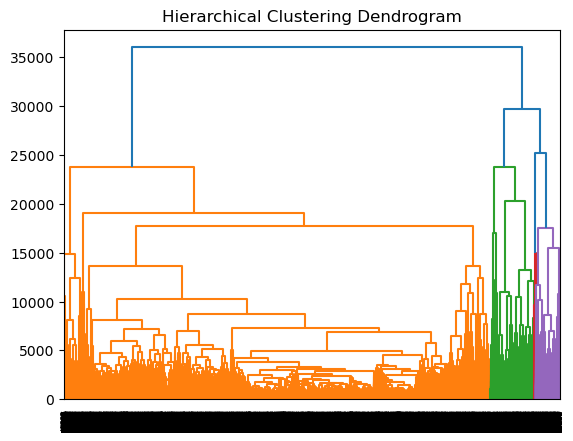

In [ ]:
create_dendrogram(customers_without_scaling, 'complete')

From the dendrogram, it can be observed that the optimal number of clusters is 6.

In [ ]:
customers['no_scaling_complete_6'] = AgglomerativeClustering(linkage = 'complete', n_clusters = 6).fit_predict(customers_without_scaling)

In [ ]:
group_by_mean(customers,'no_scaling_complete_6' )

no_scaling_complete_6,0,1,2,3,4,5
number_complaints,0.482081,0.495726,0.740418,0.472441,0.504049,0.496340
distinct_stores_visited,1.212813,1.379392,1.751821,1.393701,1.000000,1.000000
spend_groceries,15068.052965,13578.727445,3863.510086,21918.976378,7958.391363,15195.449488
spend_electronics,3382.601332,11629.950142,1404.187213,12333.897638,159.426451,165.349927
typical_hour,12.931478,13.671553,13.703027,13.296086,11.730576,12.081431
spend_vegetables,364.576007,500.060987,478.151540,496.043904,205.528217,205.817428
spend_nonalcohol_drinks,552.789407,597.145774,422.504427,580.338583,500.965587,497.702782
spend_alcohol_drinks,577.863305,996.308642,487.077384,991.598425,40.672740,39.496340
spend_meat,1208.656835,1990.280627,622.669057,2029.440945,200.394737,199.531479
spend_fish,2271.944216,3946.468825,909.647294,3916.580279,252.485937,239.924564


<b>Cluster 0</b>, named the <u>Families</u>, shows high spending on groceries and non-alcoholic drinks.

<b>Cluster 1</b>, known as the <u>Gamer Community</u>, displays the highest expenditures on electronics, videogames, and alcohol.

<b>Cluster 2</b>, identified as the <u>Savings Squad</u>, has the highest number of complaints, the most children, and makes the most purchases during promotional periods.

<b>Cluster 3</b>, labeled the <u>Loners</u>, spends the most on groceries and has the youngest customers.

<b>Cluster 4</b>, referred to as the <u>Pet Lovers</u>, spends nothing on videogames and invests significantly in pet food. Members of this cluster have few children.

<b>Cluster 5</b>, named the <u>Veggie Society</u>, doesn't spend on videogames and allocates the least money towards meat, fish, and hygiene products. They invest the most in pet food.

* Standard Scaling

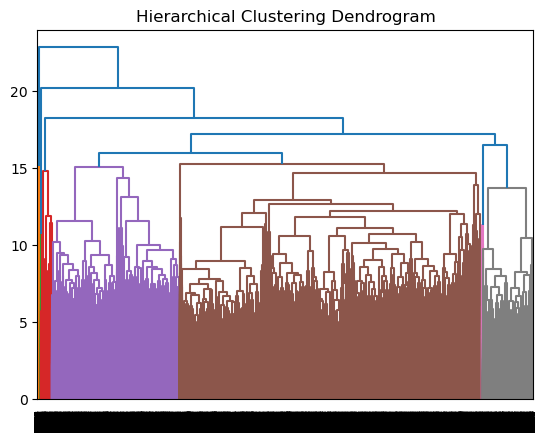

In [ ]:
create_dendrogram(customers_standard_scaling, 'complete')

The dendrogram lacks sufficient information to determine the ideal number of clusters effectively.

* Min Max Scaling

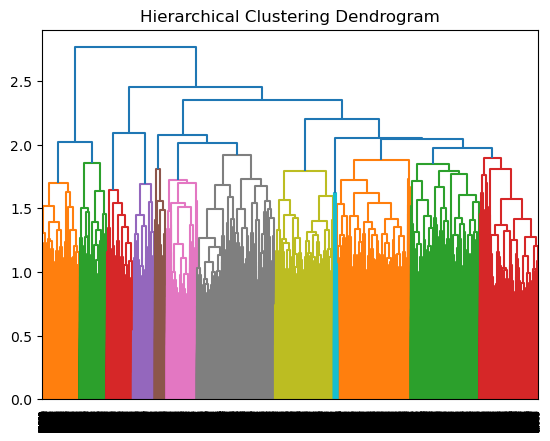

In [ ]:
create_dendrogram(customers_min_max_scaling, 'complete')

From the dendrogram, it can be observed that the optimal number of clusters is 5.

In [ ]:
customers['min_max_complete_5'] = AgglomerativeClustering(linkage = 'complete', n_clusters = 5).fit_predict(customers_min_max_scaling)

In [ ]:
group_by_mean(customers,'min_max_complete_5')

min_max_complete_5,0,1,2,3,4
number_complaints,0.722359,0.437555,0.827385,0.499220,0.490239
distinct_stores_visited,1.659611,1.672554,1.784084,1.008836,1.000000
spend_groceries,9829.601493,2967.670049,3334.683539,10717.567048,4525.360087
spend_electronics,5313.651295,1500.087311,897.426481,165.393451,155.112798
typical_hour,11.775446,14.312868,14.512111,12.049815,11.163404
spend_vegetables,405.946020,368.190748,572.015308,206.815059,205.625518
spend_nonalcohol_drinks,597.125307,377.768383,381.250871,495.120062,501.520607
spend_alcohol_drinks,1007.025232,618.274082,281.236094,46.629418,39.544469
spend_meat,1534.183425,463.824878,496.270116,201.636694,207.954447
spend_fish,3015.998075,605.911978,548.698799,242.200367,252.870294


<b>Cluster 0</b>, nicknamed the <u>Big Spenders</u>, features customers who spend the most on electronics, alcoholic and non-alcoholic drinks, meat, fish, and hygiene products. They also purchase the highest number of distinct products.

<b>Cluster 1</b>, named the <u>Gamer Community</u>, has significant expenses on electronics, videogames, and alcohol. This cluster is characterized by having the youngest customers.

<b>Cluster 2</b>, referred to as the <u>Savings Squad</u>, stands out for having the most complaints, the highest number of purchases under promotion, and the most children.

<b>Cluster 3</b>, identified as the <u>Veggie Society</u>, spends the least on meat and fish.

<b>Cluster 4</b>, labeled the <u>Pet Lovers</u>, has the fewest distinct products bought and the lowest alcohol expenditures. They spend zero euros on videogames but allocate the most funds to pet food.

* Robust Scaling

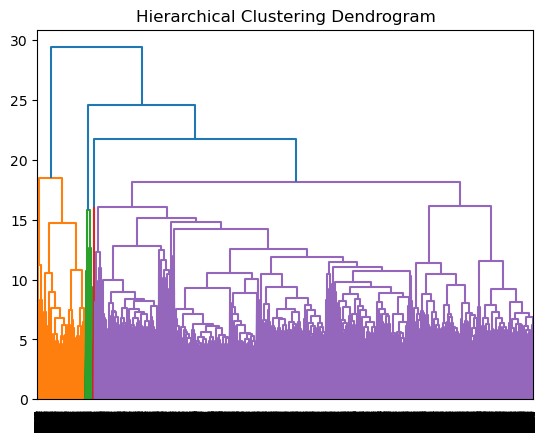

In [ ]:
create_dendrogram(customers_robust_scaling, 'complete')

From the dendrogram, it can be observed that the optimal number of clusters is 6.

In [ ]:
customers['robust_complete_6'] = AgglomerativeClustering(linkage = 'complete', n_clusters = 6).fit_predict(customers_robust_scaling)

In [ ]:
group_by_mean(customers,'robust_complete_6' )

robust_complete_6,0,1,2,3,4,5
number_complaints,0.503807,0.704801,0.000000,0.442308,0.224444,0.749256
distinct_stores_visited,1.000000,1.249552,1.363636,1.817308,1.642222,1.912265
spend_groceries,9846.818528,10077.305668,698.812987,968.485577,976.670000,3380.147866
spend_electronics,159.222589,5194.920871,487.083117,432.451923,487.232222,1130.841585
typical_hour,11.917577,15.315021,18.279098,14.423671,17.049088,12.910517
spend_vegetables,203.686479,490.764385,90.331917,377.577142,205.903788,495.176179
spend_nonalcohol_drinks,499.385533,552.145336,562.402597,1198.745192,433.633333,388.080898
spend_alcohol_drinks,40.255838,671.785721,2948.961039,475.653846,1521.003333,427.589958
spend_meat,201.723858,1514.307460,174.246753,437.100962,276.047778,502.087514
spend_fish,243.368484,2546.934384,190.097514,426.928458,328.513223,755.527083


<b>Cluster 0</b>, known as the <u>Pet Lovers</u>, visits fewer distinct stores, shops earliest in the day, spends less on alcohol (with zero expenditure on video games), and allocates the most budget to pet food.

<b>Cluster 1</b>, identified as the <u>Big Families</u>, invests the most in groceries and electronics, and has the highest number of children.

<b>Cluster 2</b>, named the <u>Veggie Society</u>/<u>Drunkards</u>, has no complaints, spends less on meat and fish, allocates the most towards alcohol, and comprises the youngest customers.

<b>Cluster 3</b>, categorized as the <u>Families</u>, spends an average amount across all categories.

<b>Cluster 4</b>, referred to as the <u>Drunkards</u>, spends significantly on alcohol and consists of younger individuals.

<b>Cluster 5</b>, called the <u>Savings Squad</u>, has the highest number of complaints, visits the most number of distinct stores, and purchases products during promotions.

<u><b>Ward</b></u>

calculates the increase in variance that results from merging clusters at each step and chooses the merge that leads to the smallest increase. Ward's method tends to produce compact, spherical clusters and is less sensitive to outliers compared to other clustering methods.
<br>
By iteratively merging clusters to minimize within-cluster variance, a hierarchical tree-like structure is formed, providing insights into the relationships between data points at different levels of granularity.

* Without Scaling

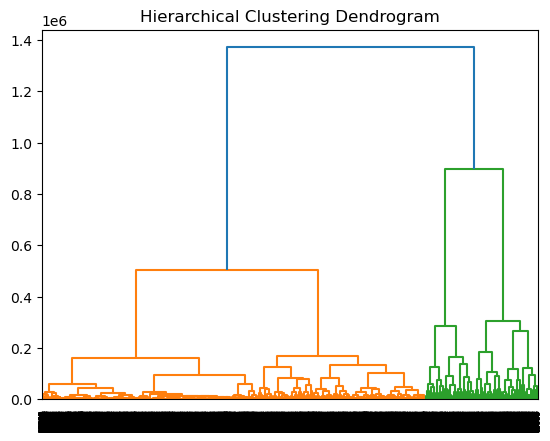

In [ ]:
create_dendrogram(customers_without_scaling, 'ward')

From the dendrogram, it can be observed that the optimal number of clusters is 3.

In [ ]:
customers['no_scaling_ward_3'] = AgglomerativeClustering(linkage = 'ward', n_clusters = 3).fit_predict(customers_without_scaling)

In [ ]:
group_by_mean(customers,'no_scaling_ward_3' )

no_scaling_ward_3,0,1,2
number_complaints,0.755440,0.493662,0.498341
distinct_stores_visited,1.784036,1.378124,1.000000
spend_groceries,3515.819737,14185.242304,10152.826066
spend_electronics,1228.582311,8214.118435,159.900000
typical_hour,13.739381,13.645891,11.929616
spend_vegetables,482.453443,498.840706,203.723668
spend_nonalcohol_drinks,412.887287,597.485150,498.857109
spend_alcohol_drinks,470.384406,1012.238501,40.344076
spend_meat,567.235277,2003.271097,202.066825
spend_fish,783.999316,3927.226208,243.220094


<b>Cluster 0</b>, often referred to as the <u>Savings Squad</u>, stands out for having the highest number of complaints, children, and making the most purchases during promotional periods.

<b>Cluster 1</b>, known as the <u>Big Families</u>, demonstrates high spending on groceries and electronics and also comprises many children.

<b>Cluster 2</b>, labeled the <u>Pet Lovers</u>, shows no expenditures on video games but allocates a significant amount of money to pet food.

* Standard Scaling

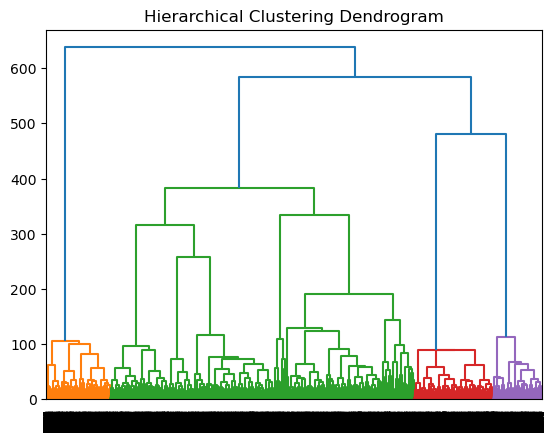

In [ ]:
create_dendrogram(customers_standard_scaling, 'ward')

From the dendrogram, it can be observed that the optimal number of clusters is 8.

In [ ]:
customers['standard_ward_8'] = AgglomerativeClustering(linkage = 'ward', n_clusters = 8).fit_predict(customers_standard_scaling)

In [ ]:
group_by_mean(customers,'standard_ward_8' )

standard_ward_8,0,1,2,3,4,5,6,7
number_complaints,0.892001,0.987147,0.008459,0.503769,0.493088,0.497170,0.982424,0.022530
distinct_stores_visited,2.635874,1.108540,1.367481,1.155842,1.377526,1.000000,1.982626,1.395147
spend_groceries,2064.292845,5046.888603,881.942669,3055.152798,14013.274371,10141.760613,5054.788485,4995.167244
spend_electronics,308.361702,2026.392174,491.873120,407.832850,8116.734846,159.965094,2110.557778,4034.454939
typical_hour,12.767904,17.427811,18.588218,13.732614,13.637131,11.926420,9.666577,13.805757
spend_vegetables,319.483642,497.165749,100.630283,981.732149,498.673923,203.828956,299.785378,301.712535
spend_nonalcohol_drinks,354.887961,501.773065,537.331767,300.701943,596.712513,498.840566,597.423030,296.868284
spend_alcohol_drinks,396.110064,301.663525,2060.675752,118.805741,1012.774725,40.307547,1000.758182,495.168977
spend_meat,445.329563,1006.655527,180.135338,2.701653,2003.357320,201.928302,998.123030,692.581889
spend_fish,560.035018,1027.681598,218.599786,3.250652,3927.698935,242.844291,1975.277997,1005.571898


<b>Cluster 0</b>, known as the <u>Savings Squad</u>, frequents the most distinct stores and makes the highest number of promotional purchases.

<b>Cluster 1</b>, identified as the <u>Big Families</u>, has the most complaints, spends the most on meat, and boasts the highest number of children.

<b>Cluster 2</b>, dubbed the <u>Drunkards</u>, registers the lowest number of complaints, allocates the most budget to alcohol, and consists of the youngest individuals.

<b>Cluster 3</b>, named the <u>Veggie Society</u>, shows minimal spending on meat and fish but invests significantly in vegetables.

<b>Cluster 4</b>, referred to as the <u>Big Families</u>/ <u>Gamer Community</u>, invests heavily in electronics, groceries, and videogames.

<b>Cluster 5</b>, labeled the <u>Pet Lovers</u>, refrains from spending on videogames, prioritizing pet food over other categories while spending zero euros on alcohol.

<b>Cluster 6</b>, another group of <u>Drunkards</u>, greatly emphasizes spending on alcohol.

<b>Cluster 7</b>, categorized as the <u>Families</u>, significantly invests in groceries and electronics, exhibiting average behavior in other categories.

* Min Max Scaling

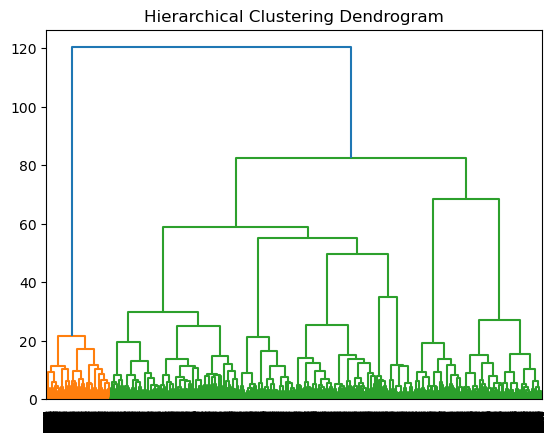

In [ ]:
create_dendrogram(customers_min_max_scaling, 'ward')

From the dendrogram, it can be observed that the optimal number of clusters is 7.

In [ ]:
customers['min_max_ward_7'] = AgglomerativeClustering(linkage = 'ward', n_clusters = 7).fit_predict(customers_min_max_scaling)

In [ ]:
group_by_mean(customers,'min_max_ward_7')

min_max_ward_7,0,1,2,3,4,5,6
number_complaints,0.021810,0.897162,0.503386,0.497755,0.493088,0.985147,0.979081
distinct_stores_visited,1.385500,2.644056,1.160640,1.000000,1.377526,1.978723,1.113277
spend_groceries,3656.807840,2062.270971,3060.426740,10142.581896,14013.274371,5056.253513,5038.034012
spend_electronics,2906.613616,303.250748,407.656822,160.017017,8116.734846,2113.853673,2014.141881
typical_hour,15.403923,12.686200,13.753000,11.929213,13.637131,9.669337,17.472174
spend_vegetables,235.892966,318.623744,979.849755,203.799521,498.673923,300.381835,496.613446
spend_nonalcohol_drinks,370.379900,356.043620,300.284829,498.859844,596.712513,597.323766,500.407428
spend_alcohol_drinks,986.510463,392.725855,121.545887,40.325928,1012.774725,997.769570,304.700583
spend_meat,528.521073,443.459236,5.012390,201.900969,2003.357320,999.198314,1005.330155
spend_fish,754.293998,560.370955,5.898120,242.660215,3927.698935,1971.574887,1023.006297


<b>Cluster 0</b>, referred to as the <u>Drunkards</u>, spends a substantial amount on alcoholic drinks and comprises the youngest individuals.

<b>Cluster 1</b>, identified as the <u>Savings Squad</u>, excels in purchasing the most products during promotional periods.

<b>Cluster 2</b>, named the <u>Veggie Society</u>, demonstrates minimal expenditure on meat and fish while prioritizing spending on vegetables.

<b>Cluster 3</b>, known as the <u>Pet Lovers</u>, avoids spending on videogames and directs their budget heavily towards pet food.

<b>Cluster 4</b>, labeled the <u>Big Spenders</u>, displays maximum spending across all categories except for alcohol. Additionally, this group has few to no children.

<b>Cluster 5</b>, the <u>Gamer Community</u>, invests significantly in videogames.

<b>Cluster 6</b>, recognized as the <u>Big Families</u>, stands out for having the most children and allocating a sizable amount towards groceries.

* Robust Scaling

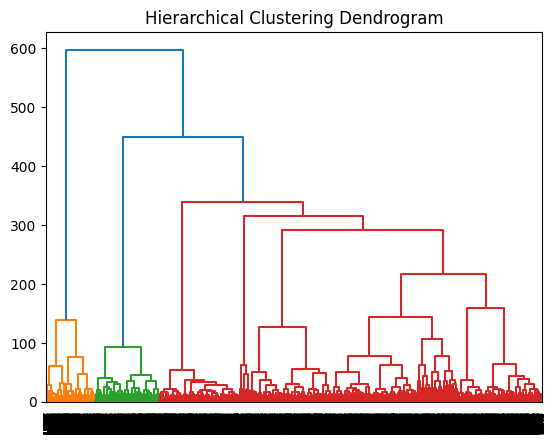

In [ ]:
create_dendrogram(customers_robust_scaling, 'ward')

From the dendrogram, it can be observed that the optimal number of clusters is 7.

In [6]:
customers['robust_ward_7'] = AgglomerativeClustering(linkage = 'ward', n_clusters = 7).fit_predict(customers_robust_scaling)

In [49]:
group_by_mean(customers,'robust_ward_7' )

robust_ward_7,0,1,2,3,4,5,6
number_complaints,0.680643,0.497288,0.874601,0.503747,0.001330,0.493088,0.983393
distinct_stores_visited,1.793374,1.000000,2.625665,1.153400,1.373670,1.377526,1.108232
spend_groceries,5041.235771,10141.790615,2014.951135,3051.455677,876.170213,14013.274371,5046.917538
spend_electronics,2727.632939,159.942231,310.817045,406.182808,496.561170,8116.734846,2022.480029
typical_hour,10.961271,11.925965,12.943842,13.719097,18.487633,13.637131,17.442372
spend_vegetables,300.519680,203.827110,301.778199,984.059544,95.116034,498.673923,497.984892
spend_nonalcohol_drinks,503.139676,498.830936,365.219581,299.674820,469.140957,596.712513,501.644238
spend_alcohol_drinks,840.391806,40.315256,418.681713,117.090768,2489.992021,1012.774725,300.416178
spend_meat,903.291312,201.946946,444.704594,2.126679,174.706117,2003.357320,1005.996278
spend_fish,1670.001141,242.860126,531.699578,44.686582,218.235240,3927.698935,1025.630920


<b>Cluster 0</b>, known as the <u>Big Spenders</u>, maintains an average spending level across all categories while purchasing the highest number of distinct products.

<b>Cluster 1</b>, dubbed the <u>Pet Lovers</u>, allocates minimal funds to alcohol, spends nothing on video games, but invests the most in pet food.

<b>Cluster 2</b>, identified as the <u>Savings Squad</u>, excels in purchasing the most products during promotional events.

<b>Cluster 3</b>, named the <u>Veggie Society</u>, shows limited expenditure on meat and fish but prioritizes spending on vegetables.

<b>Cluster 4</b>, the <u>Drunkards</u>, stands out for buying the most alcohol drinks and consisting of the youngest individuals.

<b>Cluster 5</b>, the <u>Gamer Community</u>, prioritizes purchases of videogames.

<b>Cluster 6</b>, the <u>Big Families</u>, boasts the highest number of children and complaints among the clusters.

It is important to note that all the clusters defined thus far are completely hypothetical.
<br>
After analyzing each one of them, we have decided to plot some UMAPs for some of the methods.
<br>
The method we believe captures the clusters the best is <b>Ward Hierarchical Clustering</b> with <b>Robust Scaling</b> and <b>7 clusters</b>.

Based on the conclusions reached, the a mapping of the clusters is defined, and its values are added to the customers dataset.

In [7]:
clusters_mapping = {
    0: 'Big Spenders',
    1: 'Pet Lovers',
    2: 'Savings Squad',
    3: 'Veggies Society',
    4: 'Drunkards',
    5: 'Gamer Community',
    6: 'Big Families'}

customers['cluster'] = [clusters_mapping[value] for value in customers['robust_ward_7']]

<a id="2.4"></a>
    
## <font color='#FFFFF'>2.4. UMAP Plot <font>

After several attempts, it was determined that the optimal number of neighbors for the analysis is 30, with a minimum distance between them set at 0.15. The 'random_state' parameter is set to 42 to ensure reproducibility of the results and maintain consistency in the analysis

In [ ]:
umap_object = umap.UMAP(n_neighbors = 30, min_dist = 0.15, random_state = 42)

In [ ]:
umap_embedding = umap_object.fit_transform(customers_without_scaling)

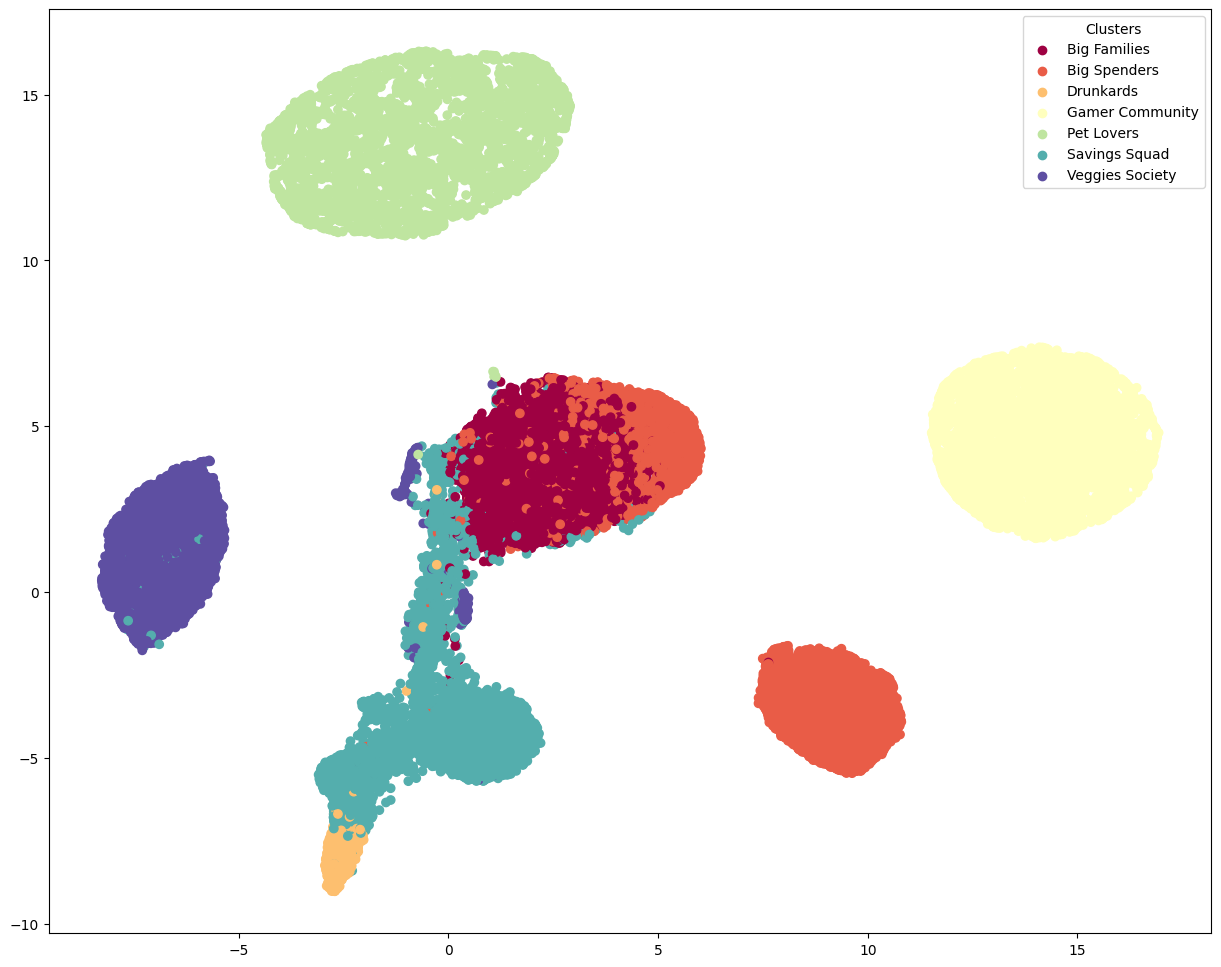

In [ ]:
UMAP(umap_embedding, customers['cluster'])

From the plot, it is apparent that the clusters corresponding to <u>Pet Lovers</u>, <u>Veggie Society</u>, and <u>Gamer Community</u> are well separated. However, the separation between the remaining clusters is not perfect, which could be attributed to potential outliers. Further investigation into outliers will be conducted in the next phase of analysis.

<a id="2.5"></a>
    
## <font color='#FFFFF'>2.5. Exporting the Datasets <font>

Subsequently, we constructed various datasets comprising each cluster's respective customers based on their cluster assignments.

In [14]:
customers_ = pd.read_csv('Datasets/customers.csv')

This was done to ensure that the clusters' datasets retain the categorical variables, as well as those that were excluded during the clustering process.

In [20]:
customers_['cluster'] = customers['cluster']

In [27]:
Big_Families = customers_[customers_['cluster'] == 'Big Families']
Big_Spenders = customers_[customers_['cluster'] == 'Big Spenders']
Drunkards = customers_[customers_['cluster'] == 'Drunkards']
Gamer_Community = customers_[customers_['cluster'] == 'Gamer Community']
Pet_Lovers = customers_[customers_['cluster'] == 'Pet Lovers']
Savings_Squad = customers_[customers_['cluster'] == 'Savings Squad']
Veggies_Society = customers_[customers_['cluster'] == 'Veggies Society']

In [30]:
Big_Families.to_csv('Big Families.csv')
Big_Spenders.to_csv('Big Spenders.csv')
Drunkards.to_csv('Drunkards.csv')
Gamer_Community.to_csv('Gamer Community.csv')
Pet_Lovers.to_csv('Pet Lovers.csv')
Savings_Squad.to_csv('Savings Squad.csv')
Veggies_Society.to_csv('Veggies Society.csv')
customers_.to_csv('Customers_with_Clusters.csv')

fishy_customers.to_csv('Fishy Pals.csv')